In [1]:
!pip install open3d numpy matplotlib scipy scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

from scipy.spatial import Delaunay
from scipy.interpolate import griddata  # For interpolation
from sklearn.neighbors import KDTree
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Load DSM Data

In [4]:
try:
    with open("dsm.json") as f:
        dsm_data = np.array(json.load(f))
    print("DSM data shape:", dsm_data.shape)
except FileNotFoundError:
    print("Error: DSM file not found.")
    exit()

DSM data shape: (9746, 3)


## Create Point Cloud

In [5]:
points = dsm_data[:, :3]

# Diagnostic prints
print(f"Number of points in point cloud: {len(points)}")
print("Point cloud coordinate ranges:")
print(f"  X min/max: {points[:, 0].min()} / {points[:, 0].max()}")
print(f"  Y min/max: {points[:, 1].min()} / {points[:, 1].max()}")
print(f"  Z min/max: {points[:, 2].min()} / {points[:, 2].max()}")

# Check for NaNs or Infs
if np.isnan(points).any() or np.isinf(points).any():
    print("Point cloud data contains NaNs or infinite values.")
    exit()
else:
    print("Point cloud data is valid.")

# Create Open3D point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Assign colors based on height (Z coordinate)
colors = plt.cm.viridis(
    (points[:, 2] - points[:, 2].min()) / (points[:, 2].ptp())
)
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

Number of points in point cloud: 9746
Point cloud coordinate ranges:
  X min/max: 757164.045 / 757240.622
  Y min/max: 4066700.343 / 4066776.928
  Z min/max: 49.75 / 61.660000000000004
Point cloud data is valid.


## Normalize Point Cloud Data

In [6]:
min_vals = points.min(axis=0)
max_vals = points.max(axis=0)
ranges = max_vals - min_vals
ranges[ranges == 0] = 1  # Avoid division by zero

points_normalized = (points - min_vals) / ranges
pcd.points = o3d.utility.Vector3dVector(points_normalized)

## Visualize the Point Cloud (3D)

In [7]:
print("Starting normalized point cloud visualization...")

vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Normalized 3D Point Cloud', width=800, height=600)
vis.add_geometry(pcd)

# Adjust camera settings
ctr = vis.get_view_control()
ctr.set_lookat([0.5, 0.5, 0.5])  # Center of normalized data
ctr.set_up([0, 1, 0])
ctr.set_front([0, 0, -1])
ctr.set_zoom(0.8)

vis.run()
vis.destroy_window()

Starting normalized point cloud visualization...


## 3D Scatter Plot with Matplotlib

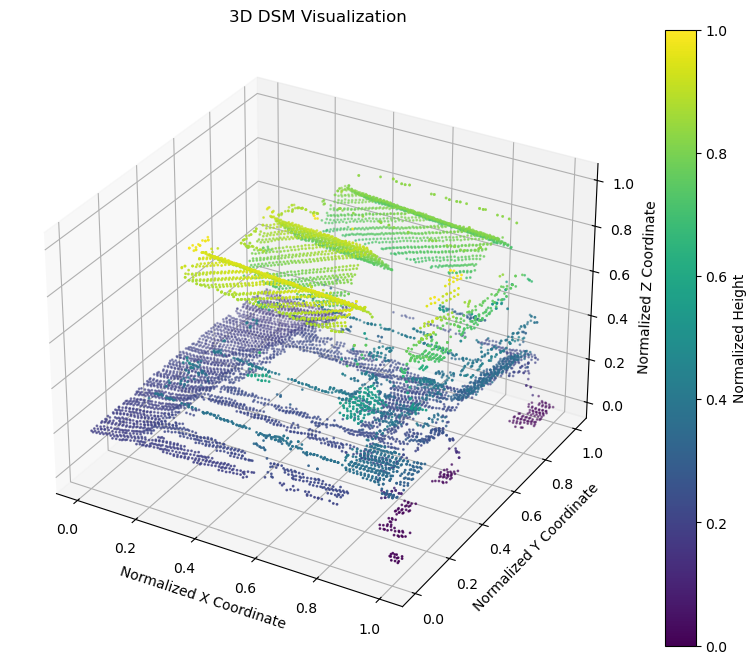

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    points_normalized[:, 0],
    points_normalized[:, 1],
    points_normalized[:, 2],
    c=points_normalized[:, 2],
    cmap='viridis',
    s=1
)
plt.colorbar(sc, label='Normalized Height')
ax.set_xlabel('Normalized X Coordinate')
ax.set_ylabel('Normalized Y Coordinate')
ax.set_zlabel('Normalized Z Coordinate')
plt.title('3D DSM Visualization')
plt.show()


## 2D Scatter Plot with Matplotlib

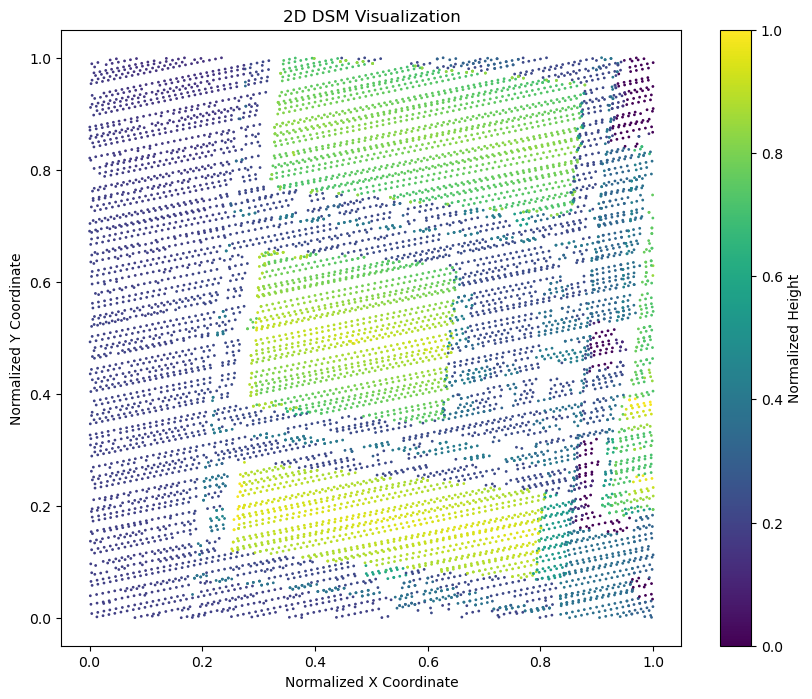

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(
    points_normalized[:, 0],
    points_normalized[:, 1],
    c=points_normalized[:, 2],
    cmap='viridis',
    s=1
)
plt.colorbar(label='Normalized Height')
plt.xlabel('Normalized X Coordinate')
plt.ylabel('Normalized Y Coordinate')
plt.title('2D DSM Visualization')
plt.show()
